# Prediction on 2018 Russia WorldCup 

## Index
- 1.Purpose
- 2.Collecting dataset
- 3.Feature engineering
- 4.Modeling
- 5.Testing

## 1.Purpose

- To predict winner of the 2018 Russia World Cup
- 32 match has been played (Date 2018-06-25),I will use the 32 match data as a train data set to predict winner of the Russia WC!
- I will also use previous WC data and  players market values data to get more accurate prediction 
- After predicting 3rd round match, I will also predict the knockout stages as well 

In [1]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/6ErVNAb9pPc/maxresdefault.jpg")

## 2.Collecting dataset

training data set and testing data are given in my github
https://github.com/Hwnag-jihoon/Prediction-on-2018-Russia-WorldCup



- The data I collected were from mostly on FIFA's official web, and I also refered korean wikipedia (links:https://ko.wikipedia.org/wiki/FIFA_%EC%9B%94%EB%93%9C%EC%BB%B5)


In [1]:
from IPython.display import Image
Image(url= "http://kspn.co.kr/wp-content/uploads/2017/11/%EB%9F%AC%EC%8B%9C%EC%95%84.png")

In [2]:
from IPython.display import Image
Image(url= "https://mblogthumb-phinf.pstatic.net/MjAxODA2MTZfMTA1/MDAxNTI5MTE3OTMzODI5.VMuZwC06hkXCLNk-BgkFPhwyB_vzjXCuZbllqr3Rw5Ug.09aBClr4fWbs2ldyHhs4HpKAO9pDu7mv6fmgzVFdDWMg.PNG.3832nirvana/%EA%B0%80%EC%B9%981.PNG?type=w800")

In [3]:
from IPython.display import Image
Image(url= "https://mblogthumb-phinf.pstatic.net/MjAxODA2MTZfMTE1/MDAxNTI5MTE3OTMzODg0.w2zrZQLeOcX-ei-IGO-Ofj-X-Z1NU3yK00b_7yuticog.ammKJuEcgDCkwMl6mK-rg-7Y3jj7XrbzQizRctb5ZRgg.PNG.3832nirvana/%EA%B0%80%EC%B9%982.PNG?type=w800")

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [166]:
train = pd.read_csv('WC2018_train.csv')
test = pd.read_csv('test_third_round.csv')

In [167]:
train.head(32)

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result
0,a,Russia,11,59,145.64,65,1,Saudi Arabia,50,8,16.94,63,4,1.0,2.0,1
1,a,Uruguay,9,72,335.70,21,2,Egypt,65,2,177.50,31,3,-1.0,-2.0,1
2,b,Spain,5,99,930.60,6,2,Portugal,17,43,445.05,3,1,-12.0,-31.0,0
3,b,Iran,54,6,43.47,32,3,Morocco,44,10,116.51,40,4,-2.0,-2.0,1
4,c,Australia,46,9,45.23,39,4,France,7,96,972.45,9,1,1.0,6.0,2
5,c,Peru,37,15,34.67,11,2,Denmark,25,26,233.37,12,3,NaN,NaN,2
6,d,Argentina,4,140,629.10,4,1,Iceland,70,0,68.45,22,3,NaN,NaN,0
7,d,Croatia,27,23,327.60,17,2,Nigeria,32,18,121.37,50,4,NaN,NaN,1
8,e,Serbia,12,59,246.11,37,4,Costarica,29,19,36.14,26,3,NaN,NaN,2
9,e,Brazil,1,227,882.90,2,1,Switzerland,21,39,196.29,8,2,1.0,2.0,0


In [168]:
test.head(16)

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result
0,a,Russia,11,59,145.64,65,1,Uruguay,9,72,335.70,21,2,0.0,0.0,NaN
1,a,Saudi Arabia,50,8,16.94,63,4,Egypt,65,2,177.50,31,3,-5.0,-5.0,NaN
2,b,Portugal,17,43,445.05,3,1,Iran,54,6,43.47,32,3,2.0,5.0,NaN
3,b,Spain,5,99,930.60,6,2,Morocco,44,10,116.51,40,4,5.0,7.0,NaN
4,c,France,7,96,972.45,9,1,Denmark,25,26,233.37,12,3,4.0,9.0,NaN
5,c,Australia,46,9,45.23,39,4,Peru,37,15,34.67,11,2,NaN,NaN,NaN
6,d,Argentina,4,140,629.10,4,1,Nigeria,32,18,121.37,50,4,3.0,1.0,NaN
7,d,Iceland,70,0,68.45,22,3,Croatia,27,23,327.60,17,2,-3.0,-9.0,NaN
8,e,Brazil,1,227,882.90,2,1,Serbia,12,59,246.11,37,4,1.0,1.0,NaN
9,e,Switzerland,21,39,196.29,8,2,Costarica,29,19,36.14,26,3,0.0,1.0,NaN


## Data dictionary
- history with opponent W-L:
  +n = team1 has won n more games, -n = team2 has won n more games, 0 = equal,
  nan = no match has been played
- history with opponent goals:
  +n = team1 has scored n more goals, -n = team2 has scored n more goals, 0 = equal,
  nan = no match has been played
- result: 0= draw, 1 = team1 wins, 2 = team2 wins

In [169]:
train.shape

(32, 16)

In [170]:
test.shape

(16, 16)

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
Group                          32 non-null object
Team1                          32 non-null object
Team1 WC rank                  32 non-null int64
Team1 WC rank points           32 non-null int64
Team1 market val.              32 non-null float64
Team1 FIFA Rank                32 non-null int64
Team1 pot                      32 non-null int64
Team2                          32 non-null object
Team2 WC rank                  32 non-null int64
Team2 WC rank points           32 non-null int64
Team2 market val.              32 non-null float64
Team2 FIFA Rank                32 non-null int64
Team2 pot                      32 non-null int64
history with opponent W-L      21 non-null float64
history with opponent goals    21 non-null float64
result                         32 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 4.1+ KB


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
Group                          16 non-null object
Team1                          16 non-null object
Team1 WC rank                  16 non-null int64
Team1 WC rank points           16 non-null int64
Team1 market val.              16 non-null float64
Team1 FIFA Rank                16 non-null int64
Team1 pot                      16 non-null int64
Team2                          16 non-null object
Team2 WC rank                  16 non-null int64
Team2 WC rank points           16 non-null int64
Team2 market val.              16 non-null float64
Team2 FIFA Rank                16 non-null int64
Team2 pot                      16 non-null int64
history with opponent W-L      14 non-null float64
history with opponent goals    14 non-null float64
result                         0 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 2.1+ KB


### import python lib for visualization

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Bar chart for Categorical features

- Pot

In [174]:
def bar_chart(feature1,feature2):
    for i in range(0,32):
        if (train['result']== 1)[i].item():
            win = train[train['result']==1][feature1].value_counts()
            lose = train[train['result']==1][feature2].value_counts()
    
        elif (train['result']== 2)[i].item():
            win = train[train['result']== 2][feature2].value_counts()
            lose = train[train['result']== 2][feature1].value_counts()
    
        elif (train['result']== 0)[i].item():
            draw = train[train['result']== 0][feature1].value_counts()
            draw = train[train['result']== 0][feature2].value_counts()
        
    df = pd.DataFrame([win,draw,lose])
    df.index = ['Win','Draw','Lose']
    df.plot(kind='bar', stacked = True, figsize= (5,5))
    

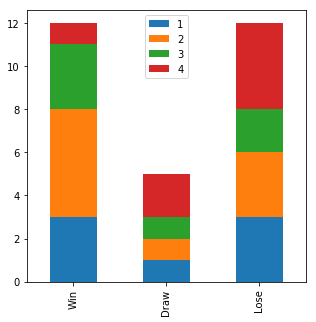

In [175]:
bar_chart('Team1 pot','Team2 pot')

- Seems like teams in Pot2 & Pot3 have won the 1st, 2nd match
- Teams in Pot1 had even number of wins and loses 
- Teams in Pot4 lost most of the games 

# 3.Feature Engineering
## 3.1 Binning
To get more grahical information, I needed to bind some data into groups

## - FIFA Rank, WC Rank:

1) 1~10 = 1 

2) 11~20 = 2

3) 21~30 = 3

4) 31~40 = 4

5) 41~50 = 5

6) 51~60 = 6

7) 60~ = 7

In [182]:
def get_rank(column):
    return int(column/10 + 1)

In [186]:
train['Team1 FIFA Rank'] = train['Team1 FIFA Rank'].apply(get_rank)
train['Team2 FIFA Rank'] = train['Team2 FIFA Rank'].apply(get_rank)
train['Team1 WC rank'] = train['Team1 WC rank'].apply(get_rank)
train['Team2 WC rank'] = train['Team2 WC rank'].apply(get_rank)
train

,Group,Team1,Team1 WC rank,Team1 WC rank points,Team1 market val.,Team1 FIFA Rank,Team1 pot,Team2,Team2 WC rank,Team2 WC rank points,Team2 market val.,Team2 FIFA Rank,Team2 pot,history with opponent W-L,history with opponent goals,result
0,a,Russia,2,59,145.64,7,1,Saudi Arabia,6,8,16.94,7,4,1.0,2.0,1
1,a,Uruguay,1,72,335.70,3,2,Egypt,7,2,177.50,4,3,-1.0,-2.0,1
2,b,Spain,1,99,930.60,1,2,Portugal,2,43,445.05,1,1,-12.0,-31.0,0
3,b,Iran,6,6,43.47,4,3,Morocco,5,10,116.51,5,4,-2.0,-2.0,1
4,c,Australia,5,9,45.23,4,4,France,1,96,972.45,1,1,1.0,6.0,2
5,c,Peru,4,15,34.67,2,2,Denmark,3,26,233.37,2,3,NaN,NaN,2
6,d,Argentina,1,140,629.10,1,1,Iceland,8,0,68.45,3,3,NaN,NaN,0
7,d,Croatia,3,23,327.60,2,2,Nigeria,4,18,121.37,6,4,NaN,NaN,1
8,e,Serbia,2,59,246.11,4,4,Costarica,3,19,36.14,3,3,NaN,NaN,2
9,e,Brazil,1,227,882.90,1,1,Switzerland,3,39,196.29,1,2,1.0,2.0,0


- Panama, Iceland had no data on WC Rank, because it's thier first time to participate in the world cup. 

- I'll put them to 8(the lowest)

### bar_chart on FIFA Rank

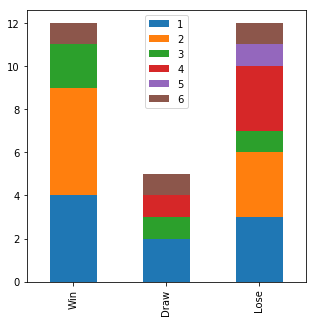

In [187]:
bar_chart('Team1 FIFA Rank','Team2 FIFA Rank')

### bar_chart on WC Rank

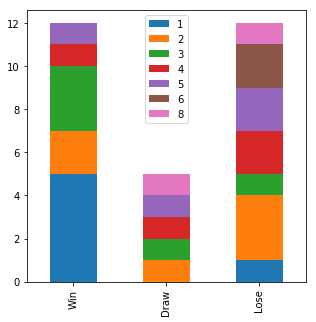

In [189]:
bar_chart('Team1 WC rank','Team2 WC rank')

## - Market val.


In [190]:
def get_market_val(column):
    return int(column/50 + 1)

In [191]:
train['Team1 market val.'] = train['Team1 market val.'].apply(get_market_val)
train['Team2 market val.'] = train['Team2 market val.'].apply(get_market_val)

### bar chart on Market value

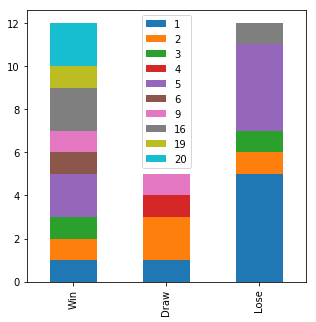

In [193]:
bar_chart('Team1 market val.','Team2 market val.')